In [3]:
#The first step of the code is to import modules to be used in different parts of the program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [5]:
!gdown 1RhQdGAUC_EiHsTQsqHcQZLgsVgP5ykxb

Downloading...
From: https://drive.google.com/uc?id=1RhQdGAUC_EiHsTQsqHcQZLgsVgP5ykxb
To: /content/logistic_regression.csv
100% 100M/100M [00:02<00:00, 39.7MB/s] 


In [6]:
#Reading storing and dispalying the dataset
df=pd.read_csv('logistic_regression.csv')
pd.options.display.max_columns = None
display(df[:5])

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
#Qerying the dimension of the dataset
df.shape

(396030, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,396030,396030,396030,396030,394275,396030.000000,396030,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,3,115,2,14,48817,NaN,684,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,NaN,Oct-2000,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,139563,14846,318357,234507,152472,NaN,3017,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,NaN,NaN,NaN,NaN,NaN,17.379514,NaN,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,NaN,NaN,NaN,NaN,NaN,18.019092,NaN,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,NaN,NaN,NaN,NaN,NaN,11.280000,NaN,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,NaN,NaN,NaN,NaN,NaN,16.910000,NaN,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,NaN,NaN,NaN,NaN,NaN,22.980000,NaN,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [ ]:
df['zip_code']=df.address.apply(lambda x: x[-5:])

In [ ]:
a=pd.to_datetime(df['issue_d'])

In [ ]:
#from issue_d feature extract the year and month to get year of issue and month of issue feature
df['yoi']=a.dt.year
df['moi']=a.dt.year

In [ ]:
df.drop('address',axis=1,inplace=True)

In [ ]:
pd.options.display.max_columns = None
display(df[:5])

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code,yoi,moi
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,22690,2015,2015
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,05113,2015,2015
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,05113,2015,2015
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,00813,2014,2014
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,11650,2013,2013


### Detecting and handling null values

In [ ]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
zip_code                    0
yoi                         0
moi                         0
dtype: int64

In [ ]:
imputer=SimpleImputer()
v=df['revol_util'].values
v1=df['mort_acc'].values
v2=df['pub_rec_bankruptcies'].values
df['revol_util']=imputer.fit_transform(v.reshape(-1,1))
df['mort_acc']=imputer.fit_transform(v1.reshape(-1,1))
df['pub_rec_bankruptcies']=imputer.fit_transform(v2.reshape(-1,1))

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.shape

(371385, 29)

In [ ]:
ls=df['pub_rec']
f=[1 if x ==1.0  else 0 for x in ls]
df['pub_rec']=f

In [ ]:
ls=df['mort_acc']
f=[1 if x ==1.0  else 0 for x in ls]
df['mort_acc']=f

In [ ]:
ls=df['pub_rec_bankruptcies']
f=[1 if x ==1.0  else 0 for x in ls]
df['pub_rec_bankruptcies']=f

In [ ]:
pd.options.display.max_columns = None
display(df[:5])

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code,yoi,moi
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0,0,22690,2015,2015
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,0,0,05113,2015,2015
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,05113,2015,2015
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0,00813,2014,2014
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,1,0,11650,2013,2013


## Univariate Analysis

### Non Visual Analysis

#### Continuous Features

In [ ]:
#Median loan amount of the two classes
df.groupby(['loan_status'])['loan_amnt'].median()

loan_status
Charged Off    14075.0
Fully Paid     12000.0
Name: loan_amnt, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371385 entries, 0 to 396029
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             371385 non-null  float64
 1   term                  371385 non-null  object 
 2   int_rate              371385 non-null  float64
 3   installment           371385 non-null  float64
 4   grade                 371385 non-null  object 
 5   sub_grade             371385 non-null  object 
 6   emp_title             371385 non-null  object 
 7   emp_length            371385 non-null  object 
 8   home_ownership        371385 non-null  object 
 9   annual_inc            371385 non-null  float64
 10  verification_status   371385 non-null  object 
 11  issue_d               371385 non-null  object 
 12  loan_status           371385 non-null  object 
 13  purpose               371385 non-null  object 
 14  title                 371385 non-null  object 
 15  

In [ ]:
#Median interest rate of the two classes
df.groupby(['loan_status'])['int_rate'].median()

loan_status
Charged Off    15.61
Fully Paid     12.99
Name: int_rate, dtype: float64

In [ ]:
#Median number of installment of the two classes
df.groupby(['loan_status'])['installment'].median()

loan_status
Charged Off    405.96
Fully Paid     373.18
Name: installment, dtype: float64

In [ ]:
#Median annual income of the two classes
df.groupby(['loan_status'])['annual_inc'].median()

loan_status
Charged Off    60000.0
Fully Paid     65000.0
Name: annual_inc, dtype: float64

In [ ]:
#Median debt-to-income ratio of the two classes
df.groupby(['loan_status'])['dti'].median()

loan_status
Charged Off    19.32
Fully Paid     16.34
Name: dti, dtype: float64

In [ ]:
#Median number of open credit lines of the two classes
df.groupby(['loan_status'])['open_acc'].median()

loan_status
Charged Off    11.0
Fully Paid     10.0
Name: open_acc, dtype: float64

In [ ]:
#Median number of derogatory public records of the two classes
df.groupby(['loan_status'])['pub_rec'].median()

loan_status
Charged Off    0.0
Fully Paid     0.0
Name: pub_rec, dtype: float64

In [ ]:
#Median credit revolving balance of the two classes
df.groupby(['loan_status'])['revol_bal'].median()

loan_status
Charged Off    11431.0
Fully Paid     11263.0
Name: revol_bal, dtype: float64

In [ ]:
#Median revolving line utilization rate of the two classes
df.groupby(['loan_status'])['revol_util'].median()

loan_status
Charged Off    59.5
Fully Paid     53.9
Name: revol_util, dtype: float64

In [ ]:
#Median total credit lines of the two classes
df.groupby(['loan_status'])['total_acc'].median()

loan_status
Charged Off    23.0
Fully Paid     24.0
Name: total_acc, dtype: float64

In [ ]:
#Median number of mortgage accounts of the two classes
df.groupby(['loan_status'])['mort_acc'].median()

loan_status
Charged Off    0.0
Fully Paid     0.0
Name: mort_acc, dtype: float64

In [ ]:
#Median number of public record bankruptcies of the two classes
df.groupby(['loan_status'])['pub_rec_bankruptcies'].median()

loan_status
Charged Off    0.0
Fully Paid     0.0
Name: pub_rec_bankruptcies, dtype: float64

#### Categorical Features

In [ ]:
#Most occuring term of the two classes
df.groupby(['loan_status'])['term'].agg(pd.Series.mode)

loan_status
Charged Off     36 months
Fully Paid      36 months
Name: term, dtype: object

In [ ]:
#Most occuring grade of the two classes
df.groupby(['loan_status'])['grade'].agg(pd.Series.mode)

loan_status
Charged Off    C
Fully Paid     B
Name: grade, dtype: object

In [ ]:
#Most occuring sub-grade of the two classes
df.groupby(['loan_status'])['sub_grade'].agg(pd.Series.mode)

loan_status
Charged Off    C4
Fully Paid     B3
Name: sub_grade, dtype: object

In [ ]:
#Most occuring home ownership of the two classes
df.groupby(['loan_status'])['home_ownership'].agg(pd.Series.mode)

loan_status
Charged Off        RENT
Fully Paid     MORTGAGE
Name: home_ownership, dtype: object

In [ ]:
#Most occuring verification_status of the two classes
df.groupby(['loan_status'])['verification_status'].agg(pd.Series.mode)

loan_status
Charged Off    Source Verified
Fully Paid        Not Verified
Name: verification_status, dtype: object

In [ ]:
#Most occuring purpose of the two classes
df.groupby(['loan_status'])['purpose'].agg(pd.Series.mode)

loan_status
Charged Off    debt_consolidation
Fully Paid     debt_consolidation
Name: purpose, dtype: object

In [ ]:
#Most occuring initial_list_status of the two classes
df.groupby(['loan_status'])['initial_list_status'].agg(pd.Series.mode)

loan_status
Charged Off    f
Fully Paid     f
Name: initial_list_status, dtype: object

In [ ]:
#Most occuring application_type of the two classes
df.groupby(['loan_status'])['application_type'].agg(pd.Series.mode)

loan_status
Charged Off    INDIVIDUAL
Fully Paid     INDIVIDUAL
Name: application_type, dtype: object

### Visual Analysis

#### Continuous Variables

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

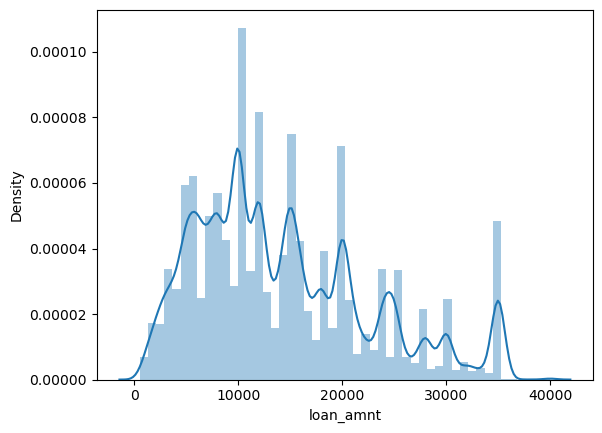

In [ ]:
sns.distplot(df['loan_amnt'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='int_rate', ylabel='Density'>

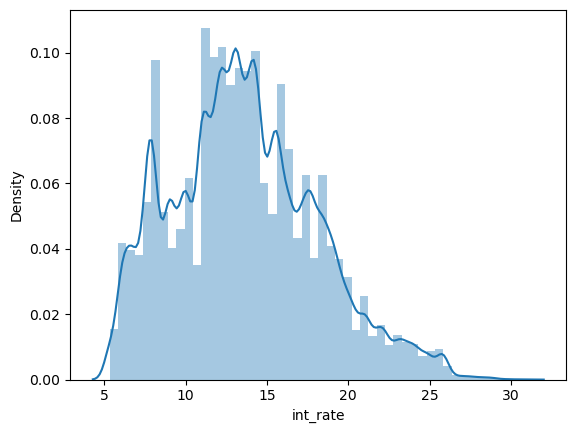

In [ ]:
sns.distplot(df['int_rate'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='installment', ylabel='Density'>

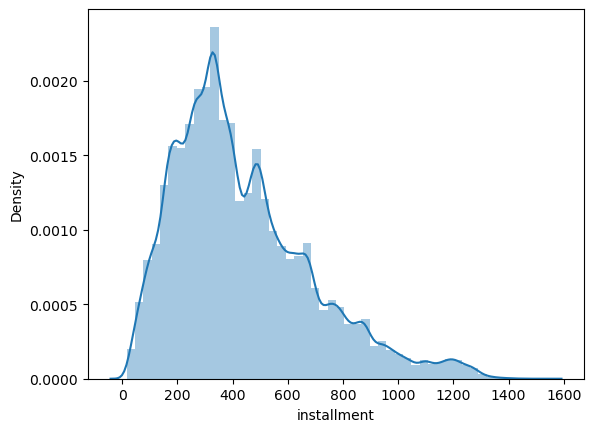

In [ ]:
sns.distplot(df['installment'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

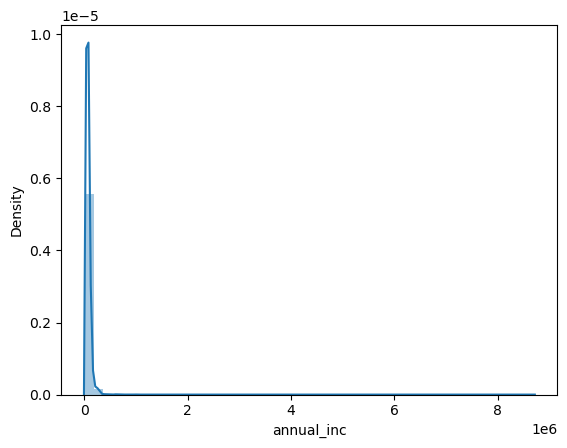

In [ ]:
sns.distplot(df['annual_inc'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dti', ylabel='Density'>

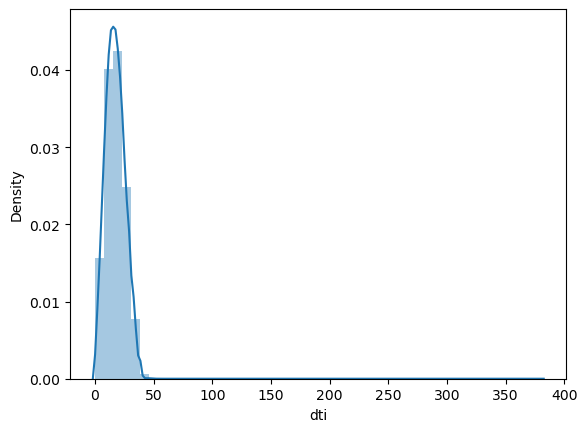

In [ ]:
sns.distplot(df['dti'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='open_acc', ylabel='Density'>

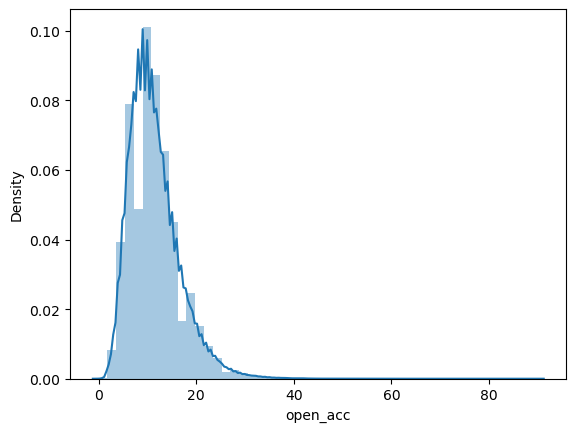

In [ ]:
sns.distplot(df['open_acc'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pub_rec', ylabel='Density'>

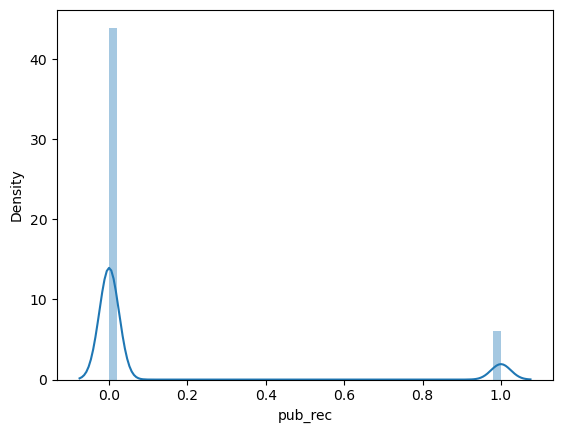

In [ ]:
sns.distplot(df['pub_rec'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revol_bal', ylabel='Density'>

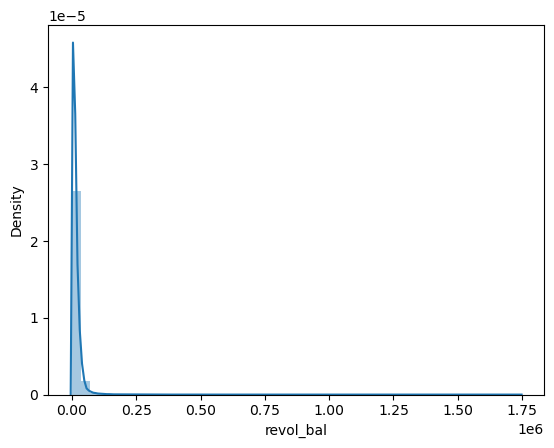

In [ ]:
sns.distplot(df['revol_bal'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revol_util', ylabel='Density'>

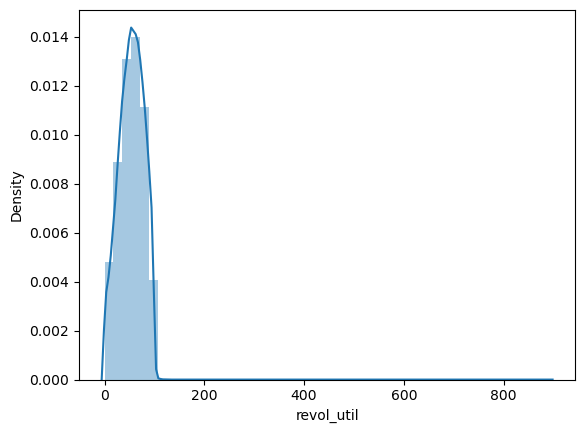

In [ ]:
sns.distplot(df['revol_util'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_acc', ylabel='Density'>

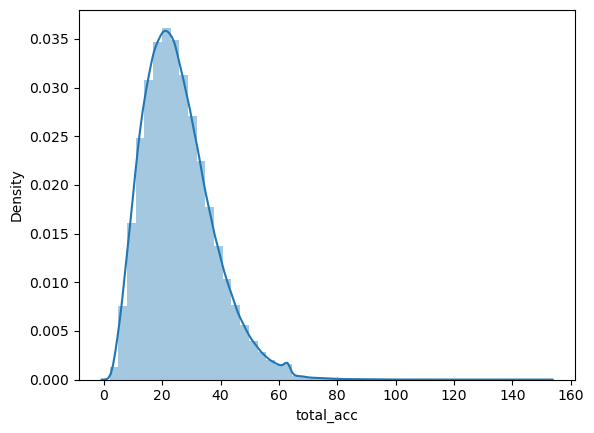

In [ ]:
sns.distplot(df['total_acc'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mort_acc', ylabel='Density'>

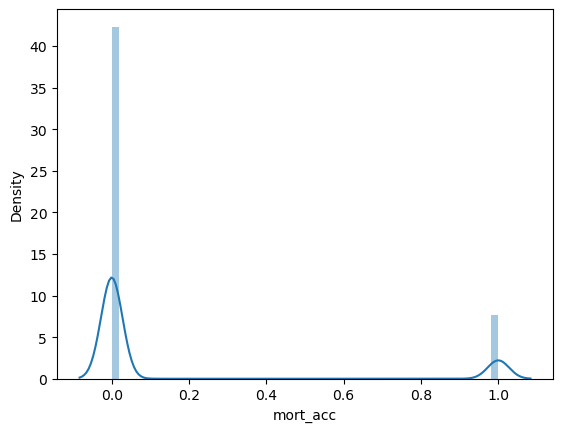

In [ ]:
sns.distplot(df['mort_acc'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='Density'>

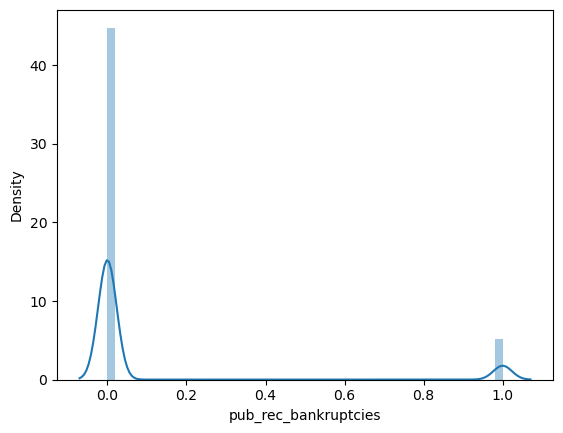

In [ ]:
sns.distplot(df['pub_rec_bankruptcies'])

#### Categorical Features

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='term', ylabel='count'>

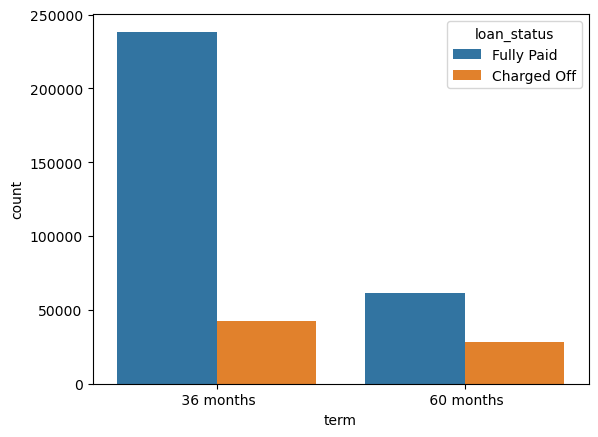

In [ ]:
sns.countplot(df['term'],hue=df['loan_status'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

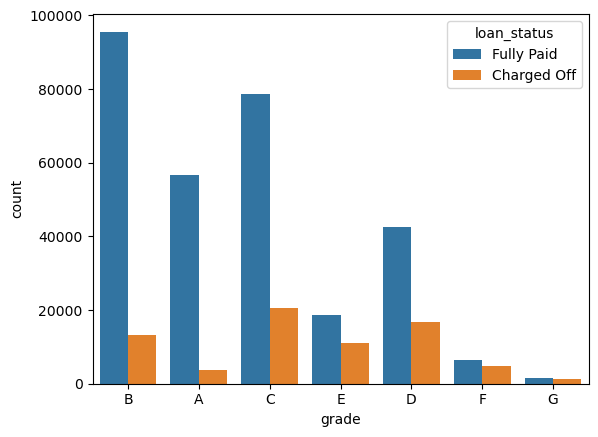

In [ ]:
sns.countplot(df['grade'],hue=df['loan_status'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

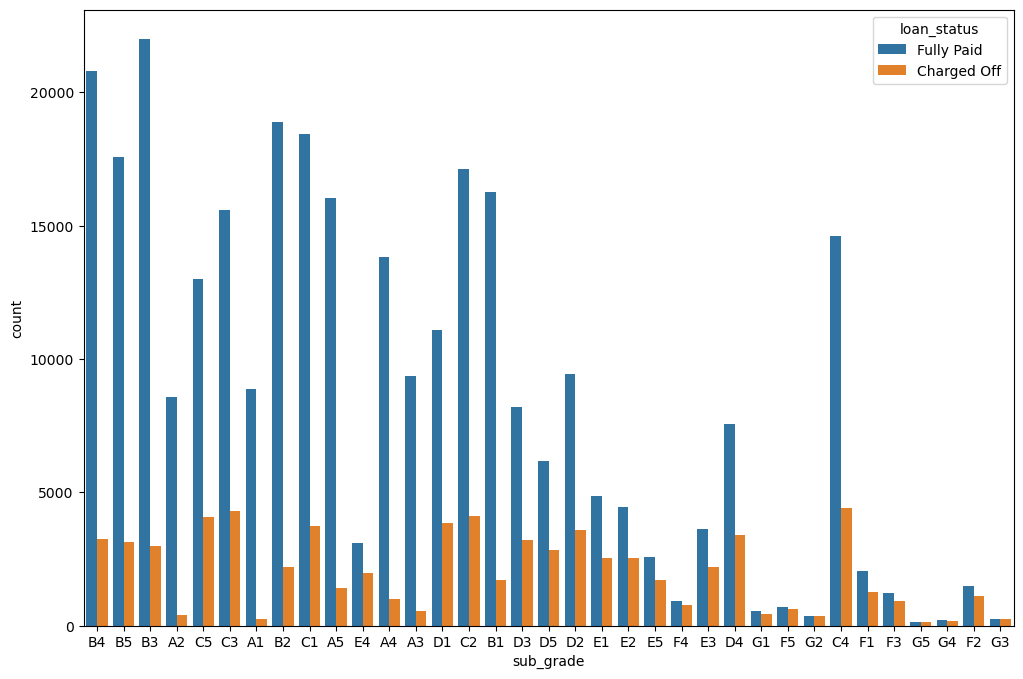

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['sub_grade'],hue=df['loan_status'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

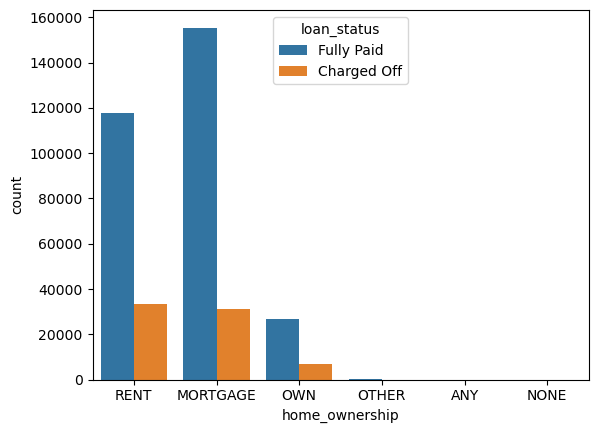

In [ ]:
sns.countplot(df['home_ownership'],hue=df['loan_status'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='verification_status', ylabel='count'>

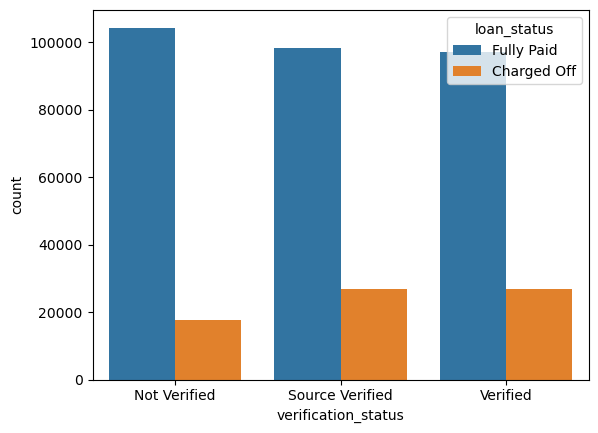

In [ ]:
sns.countplot(df['verification_status'],hue=df['loan_status'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='purpose', ylabel='count'>

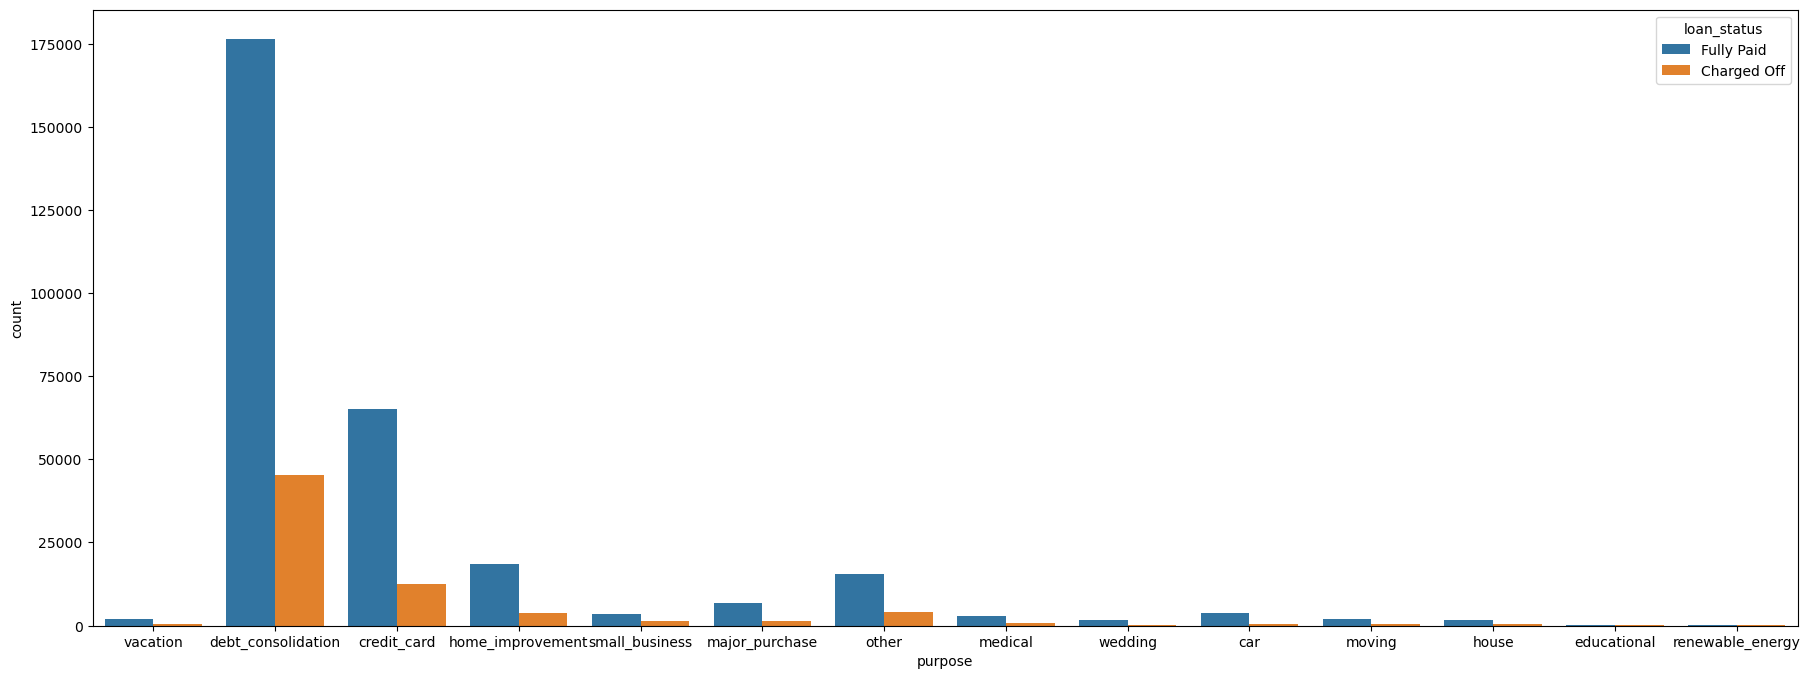

In [ ]:

plt.figure(figsize=(22,8))
sns.countplot(df['purpose'],hue=df['loan_status'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

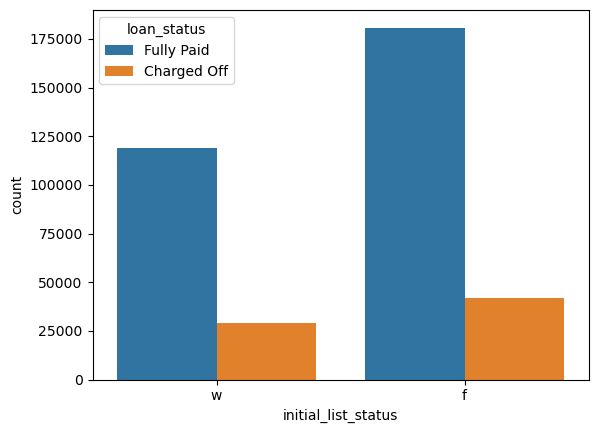

In [ ]:
sns.countplot(df['initial_list_status'],hue=df['loan_status'])

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='application_type', ylabel='count'>

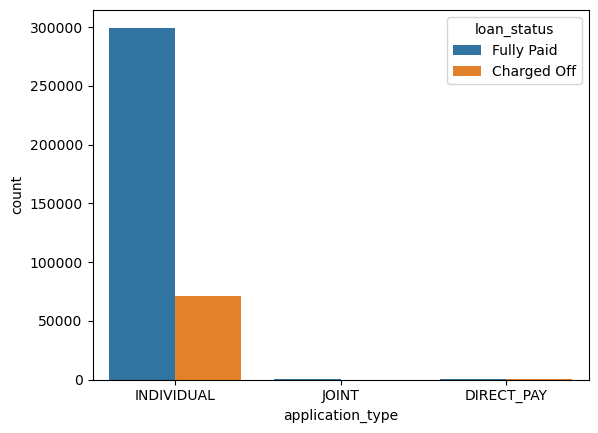

In [ ]:
sns.countplot(df['application_type'],hue=df['loan_status'])

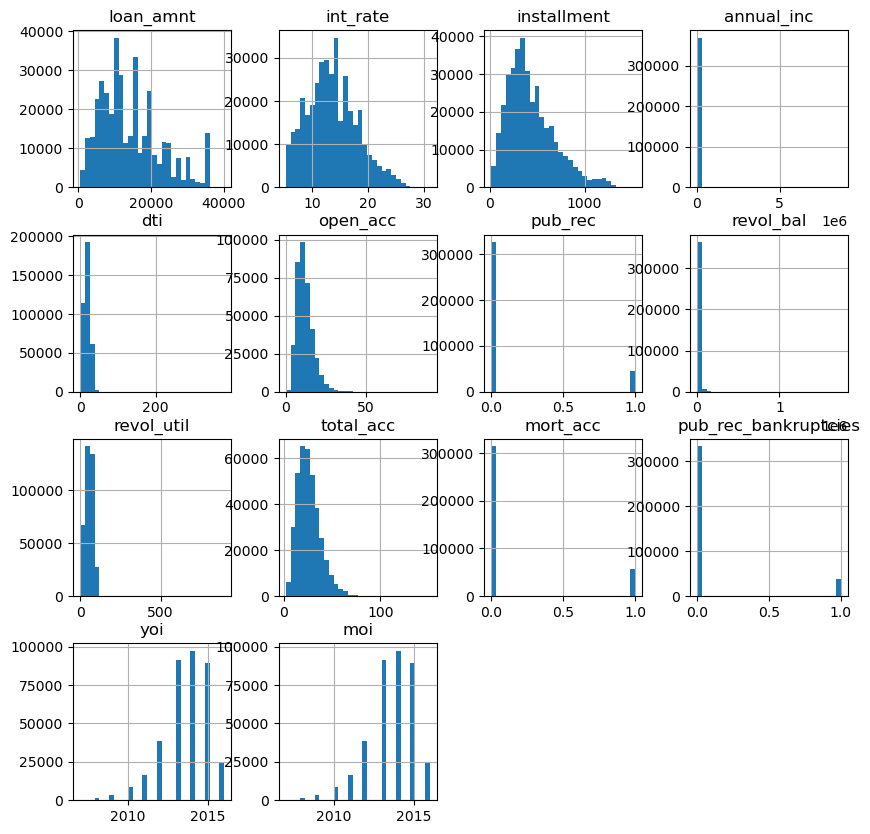

In [ ]:
#Histplot of all the continuous features
df.hist(figsize=(10,10),bins=30);

### Bivariate Analysis

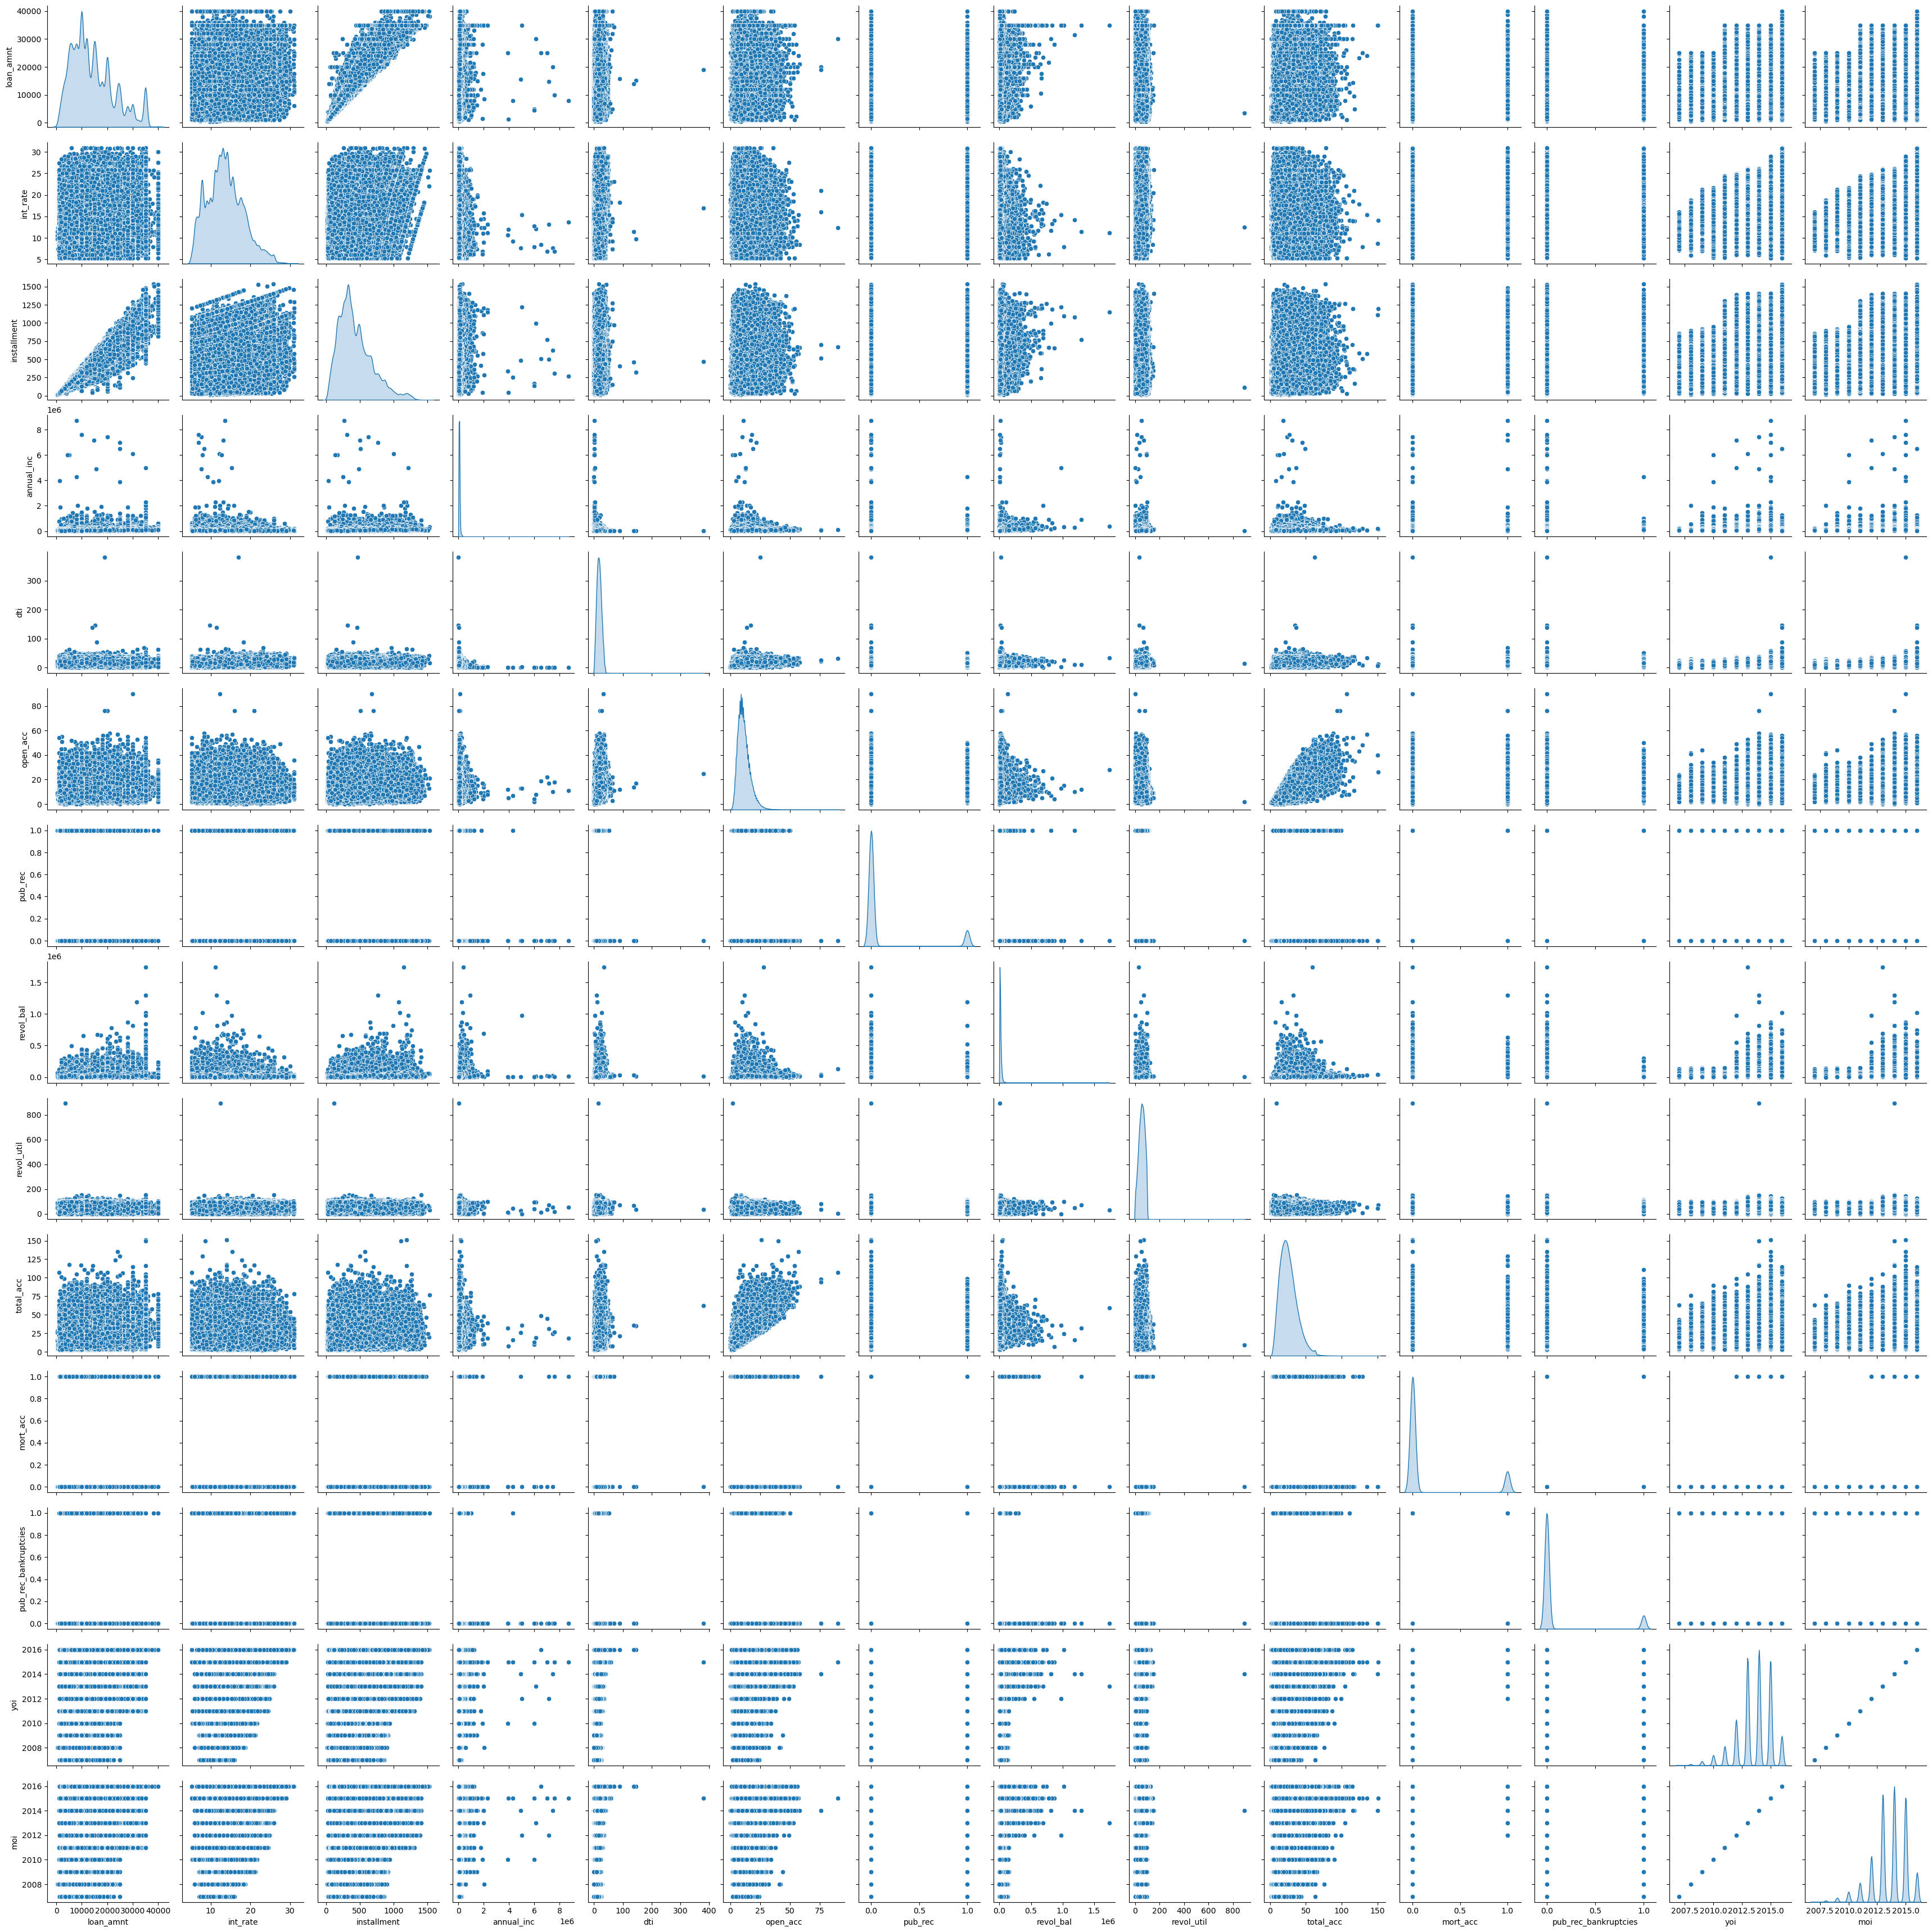

In [ ]:
#Pairplot between every pair of features
sns.pairplot(df, diag_kind='kde')

<AxesSubplot:>

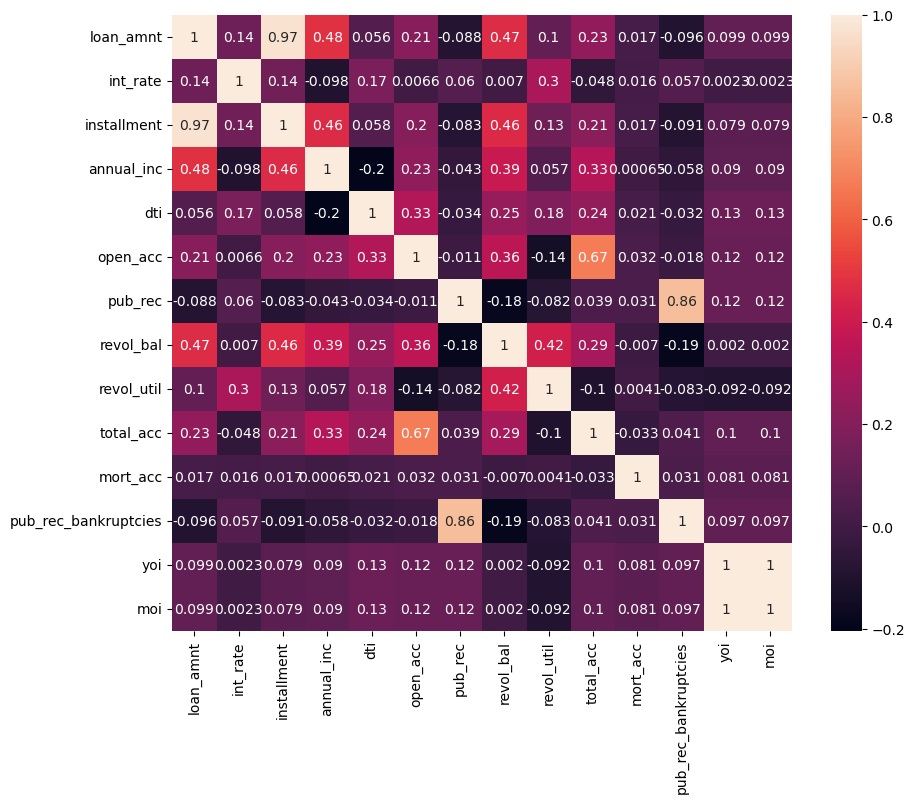

In [ ]:
#Correlation between pairs of features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(method='spearman'),annot=True)

## Outlier Treatment and Detection

In [ ]:
num_cols = df._get_numeric_data().columns

In [ ]:
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'yoi', 'moi'],
      dtype='object')

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


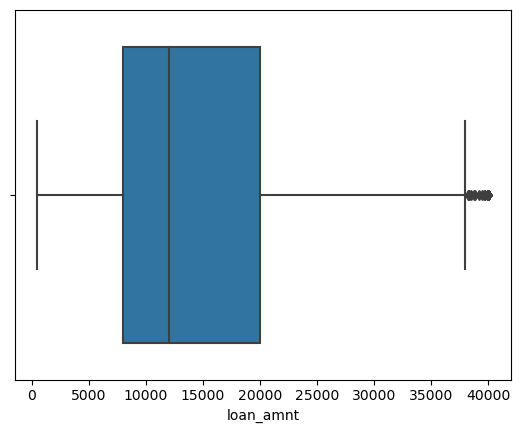

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


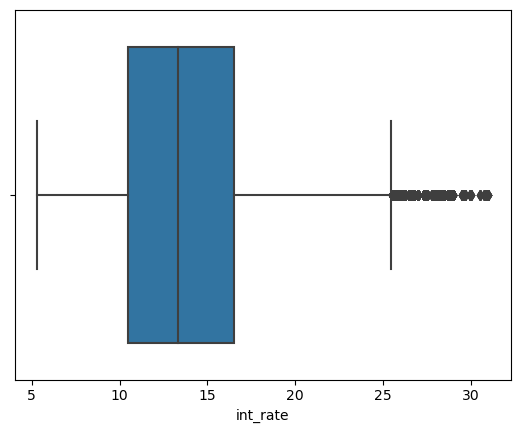

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


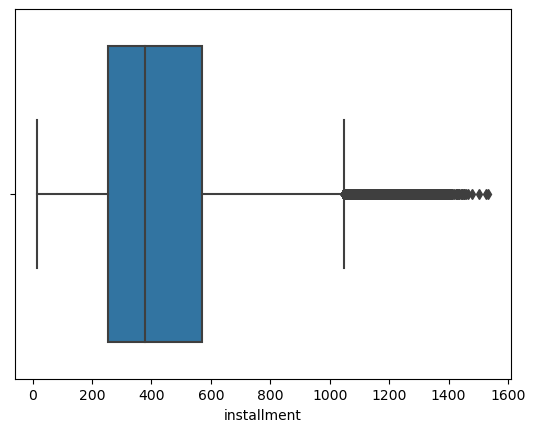

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


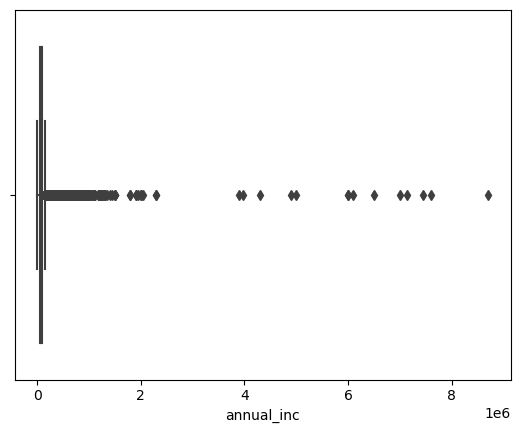

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


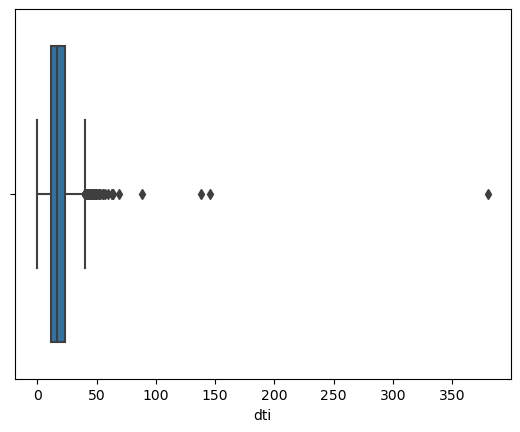

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


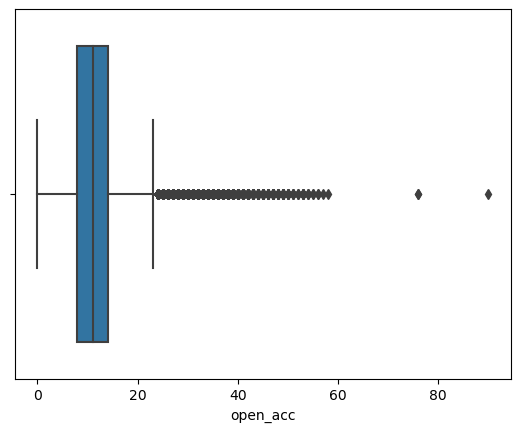

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


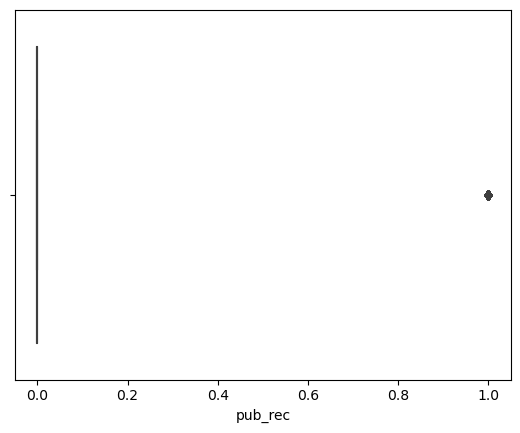

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


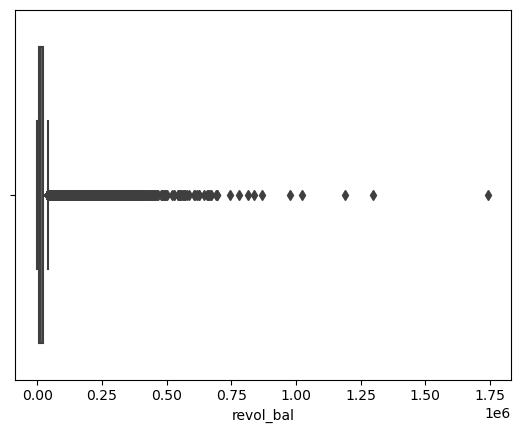

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


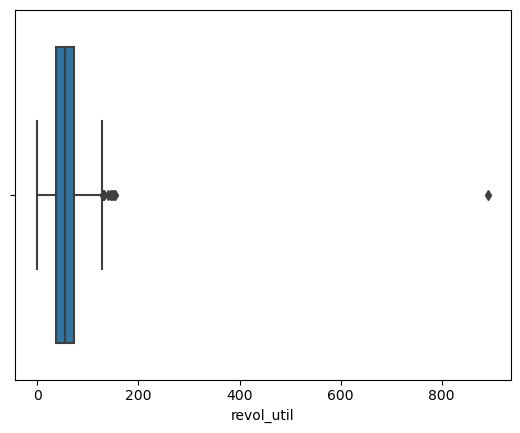

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


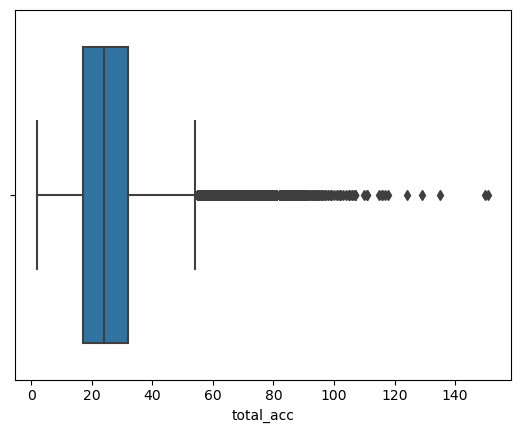

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


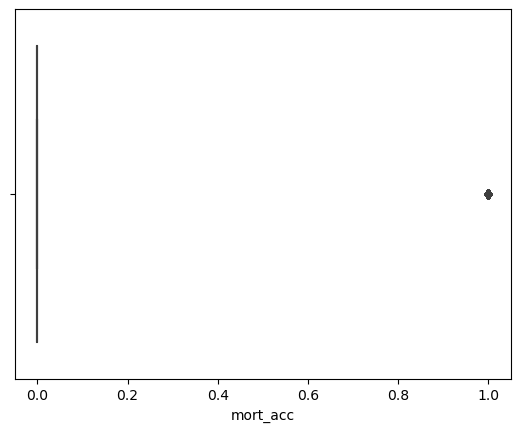

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


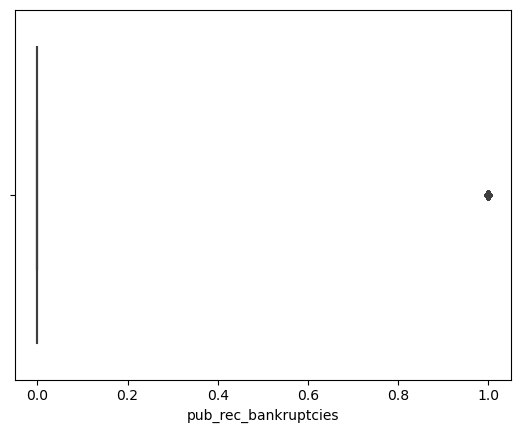

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


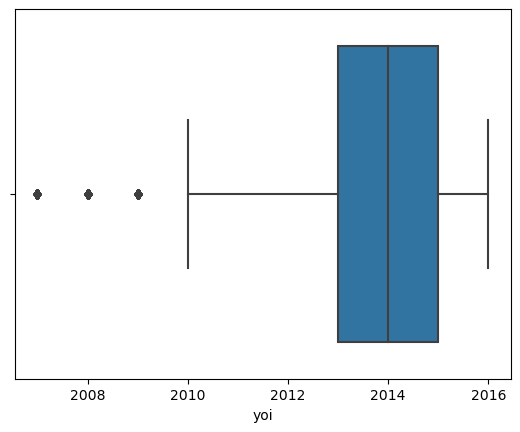

C:\Users\Lms\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


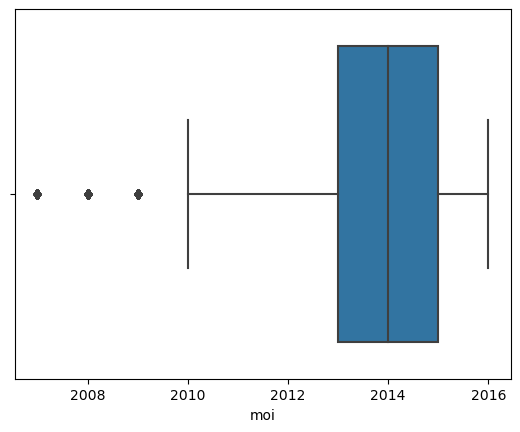

In [ ]:
for col in num_cols:
  plt.figure()
  sns.boxplot(df[col])
  plt.xlabel(f'{col}')
  plt.show()

In [ ]:
def outlier(data,feature):
  q1=data[feature].quantile(0.05)
  q3=data[feature].quantile(0.95)
  iqr=q3-q1
  ul=q3+1.5*iqr
  ll=q1-1.5*iqr
  return ul,ll


In [ ]:
df.shape

(371385, 29)

In [ ]:
for i in num_cols:
  ul,ll=outlier(df,i)
  df=df[(df[i]<ul) & (df[i]>ll)]

In [ ]:
df.shape

(367359, 29)

## Categorical Feature Encoding

In [ ]:
df['loan_status']=df.loan_status.map({'Fully Paid':0,'Charged Off':1})

In [ ]:
#df.drop(['sub_grade','emp_length','purpose'],axis=1,inplace=True)

In [ ]:
df.describe(include=object)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,earliest_cr_line,initial_list_status,application_type,zip_code
count,367359,367359,367359,367359,367359,367359,367359,367359,367359,367359,367359,367359,367359,367359
unique,2,7,35,171259,11,6,3,115,14,45465,663,2,3,10
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Oct-2014,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,70466
freq,278329,107790,24756,4351,121749,183477,123631,13972,219547,143141,2843,220862,366813,52839


In [ ]:
tenc=ce.TargetEncoder()

C:\Users\Lms\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Lms\anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [ ]:
df_sg=tenc.fit_transform(df['sub_grade'],df['loan_status'])
df['sub_grade']=df_sg

In [ ]:
df_empt=tenc.fit_transform(df['emp_title'],df['loan_status'])
df['emp_title']=df_empt

In [ ]:
df_t=tenc.fit_transform(df['title'],df['loan_status'])
df['title']=df_t

In [ ]:
df_id=tenc.fit_transform(df['issue_d'],df['loan_status'])
df['issue_d']=df_id

In [ ]:
df_purpose=tenc.fit_transform(df['purpose'],df['loan_status'])
df['purpose']=df_purpose

In [ ]:
df_ecl=tenc.fit_transform(df['earliest_cr_line'],df['loan_status'])
df['earliest_cr_line']=df_ecl

In [ ]:
df_zc=tenc.fit_transform(df['zip_code'],df['loan_status'])
df['zip_code']=df_zc

In [ ]:
df_ho=tenc.fit_transform(df['home_ownership'],df['loan_status'])
df['home_ownership']=df_ho

In [ ]:
df['grade']=df.grade.map({'A':6,'B':5,'C':4,'D':3,'E':2,'F':1,'G':0})

In [ ]:
df['emp_length']=df.emp_length.map({'10+ years':10,'9 years':9,'8 years':8,'7 years':7,'6 years':6,'5 years':5,'4 years':4,'3 years':3,'2 years':2,'1 year':1,'< 1 year':0})

In [ ]:

df1=pd.get_dummies(df['term'])
df5=pd.get_dummies(df['application_type'])
df3=pd.get_dummies(df['initial_list_status'])
df2=pd.get_dummies(df['verification_status'])

In [ ]:
df=df.join([df5,df2,df1,df3])

In [ ]:
df.drop(['application_type','term','initial_list_status','verification_status'],axis=1, inplace=True)

In [ ]:
pd.options.display.max_columns = None
display(df[:5])

,loan_amnt,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,zip_code,yoi,moi,DIRECT_PAY,INDIVIDUAL,JOINT,Not Verified,Source Verified,Verified,36 months,60 months,f,w
0,10000.0,11.44,329.48,5,0.135552,0.244186,10,0.222382,117000.0,0.246993,0,0.183036,0.196701,26.24,0.152137,16.0,0,36369.0,41.8,25.0,0,0,0.190217,2015,2015,0,1,0,1,0,0,1,0,0,1
1,8000.0,11.99,265.68,5,0.151001,0.316591,4,0.167367,65000.0,0.246993,0,0.204453,0.226790,22.05,0.230999,17.0,0,20131.0,53.3,27.0,0,0,0.000000,2015,2015,0,1,0,1,0,0,1,0,1,0
2,15600.0,10.49,506.97,5,0.119850,0.181819,0,0.222382,43057.0,0.246993,0,0.162967,0.187619,12.79,0.218884,13.0,0,11987.0,92.2,26.0,0,0,0.000000,2015,2015,0,1,0,0,1,0,1,0,1,0
3,7200.0,6.49,220.65,6,0.044889,0.192885,6,0.222382,54000.0,0.240569,0,0.162967,0.187619,2.60,0.226190,6.0,0,5472.0,21.5,13.0,0,0,0.000000,2014,2014,0,1,0,1,0,0,1,0,1,0
4,24375.0,17.27,609.33,4,0.239908,0.192885,9,0.167367,55000.0,0.159207,1,0.162967,0.089609,33.95,0.188366,13.0,0,24584.0,69.8,43.0,1,0,1.000000,2013,2013,0,1,0,0,0,1,0,1,1,0


In [ ]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [ ]:
"""
X=X[['zip_code',
 'emp_title',
 'grade',
 'sub_grade',
 'home_ownership',
 'int_rate',
 'issue_d',
 'title',
 ' 36 months',
 'f',
 'Not Verified',
 'purpose',
 'dti',
 'w',
 'revol_util',
 'mort_acc',
 'revol_bal',
 'annual_inc',
 'earliest_cr_line',
 'installment',
 ' 60 months',
 'emp_length',
 'Verified',
 'total_acc',
 'loan_amnt',
 'open_acc',
 'Source Verified']]
 """

"\nX=X[['zip_code',\n 'emp_title',\n 'grade',\n 'sub_grade',\n 'home_ownership',\n 'int_rate',\n 'issue_d',\n 'title',\n ' 36 months',\n 'f',\n 'Not Verified',\n 'purpose',\n 'dti',\n 'w',\n 'revol_util',\n 'mort_acc',\n 'revol_bal',\n 'annual_inc',\n 'earliest_cr_line',\n 'installment',\n ' 60 months',\n 'emp_length',\n 'Verified',\n 'total_acc',\n 'loan_amnt',\n 'open_acc',\n 'Source Verified']]\n "

### Dealing with Imbalanced Data

In [ ]:
sm=SMOTE()
X_sm,y_sm=sm.fit_resample(X,y)

### Standardizing the data

In [ ]:
scaler=StandardScaler()
X_sm=scaler.fit_transform(X_sm)

### Performing Train-test-split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

### Model Creation

In [ ]:
lr=LogisticRegression(max_iter=1000)
cross_val_score(lr,X_train,y_train,cv=5,scoring='precision')

array([0.96623794, 0.96830038, 0.96652671, 0.96574367, 0.96765305])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [ ]:
f_imp=np.round(lr.coef_,2)

In [ ]:
X.columns

Index(['loan_amnt', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'issue_d',
       'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'zip_code', 'yoi', 'moi', 'DIRECT_PAY',
       'INDIVIDUAL', 'JOINT', 'Not Verified', 'Source Verified', 'Verified',
       ' 36 months', ' 60 months', 'f', 'w'],
      dtype='object')

In [ ]:
odds = np.exp(lr.coef_[0])
pd.DataFrame(np.round(odds,2), 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
zip_code,3185021.93
emp_title,2.22
title,1.44
issue_d,1.37
loan_amnt,1.36
int_rate,1.24
dti,1.20
open_acc,1.17
revol_util,1.12
home_ownership,1.11


### Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     59307
           1       0.97      0.88      0.92     59294

    accuracy                           0.93    118601
   macro avg       0.93      0.93      0.93    118601
weighted avg       0.93      0.93      0.93    118601



###    Performance metrics (Precision, Recall, f1 Score, ROC curve, PR Curve)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,recall_score,precision_score,f1_score
recall_score(y_test,y_pred)

0.8816743684015246

In [ ]:
precision_score(y_test,y_pred)

0.9670545145119221

In [ ]:
f1_score(y_test,y_pred)

0.9223928788827821

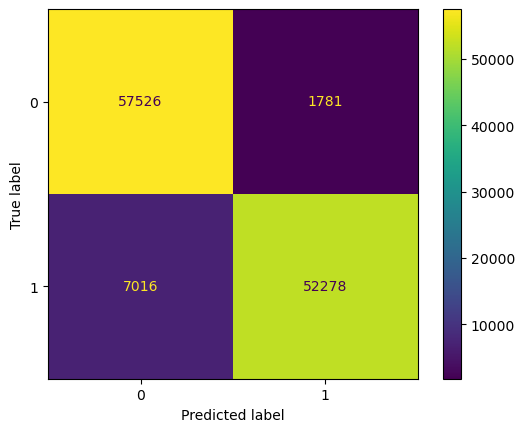

In [ ]:
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import roc_curve,precision_recall_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
pr,rc,thr=precision_recall_curve(y_test,y_pred)

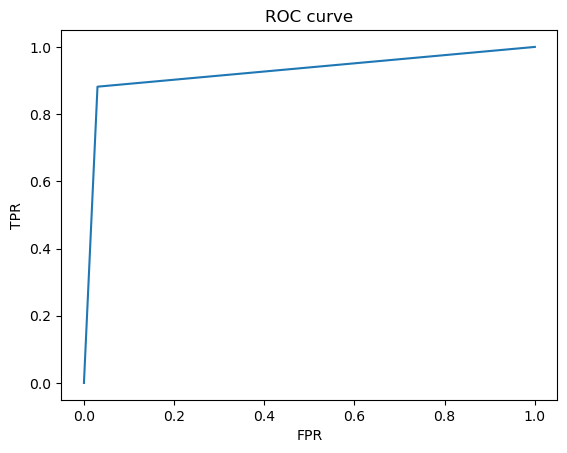

In [ ]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

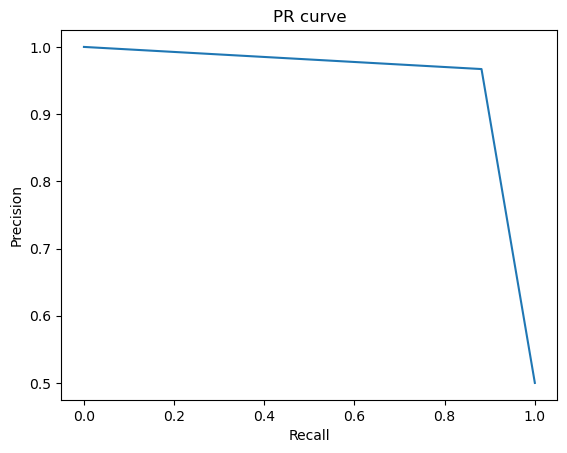

In [ ]:
plt.plot(rc,pr)
plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
"""
cval=np.arange(0.1,1,0.1)
score=[]
lamb=[]
for i in cval:
    lrt=LogisticRegression(C=i,max_iter=1000)
    s=np.mean(cross_val_score(lrt,X_train,y_train,cv=7,scoring='precision'))
    score.append(s)
    lamb.append(i)
    """

"\ncval=np.arange(0.1,1,0.1)\nscore=[]\nlamb=[]\nfor i in cval:\n    lrt=LogisticRegression(C=i,max_iter=1000)\n    s=np.mean(cross_val_score(lrt,X_train,y_train,cv=7,scoring='precision'))\n    score.append(s)\n    lamb.append(i)\n    "

In [ ]:
#reg_scores=pd.DataFrame(score,index=lamb)

In [ ]:
#reg_scores

In [ ]:
"""
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_sm, y_sm)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot
"""

'\nfrom sklearn.ensemble import RandomForestClassifier\nclf = RandomForestClassifier()\nclf.fit(X_sm, y_sm)\nimportances = clf.feature_importances_\nindices = np.argsort(importances)[::-1] # Sort feature importances in descending order\nnames = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances\nplt.figure(figsize=(15, 7)) # Create plot\nplt.title("Feature Importance") # Create plot title\nplt.bar(range(X_sm.shape[1]), importances[indices]) # Add bars\nplt.xticks(range(X_sm.shape[1]), names, rotation=90) # Add feature names as x-axis labels\nplt.show() # Show plot\n'

In [ ]:
"""
imps = pd.DataFrame(clf.feature_importances_, X.columns)
imps=imps.reset_index()
imps=imps.sort_values(by=[0],ascending=False)
a=imps['index']
b=a
c=b.tolist()
print(c)
"""

"\nimps = pd.DataFrame(clf.feature_importances_, X.columns)\nimps=imps.reset_index()\nimps=imps.sort_values(by=[0],ascending=False)\na=imps['index']\nb=a\nc=b.tolist()\nprint(c)\n"

In [ ]:
#len(c)

In [ ]:
#X_new=X[c]

In [ ]:
#X_sm,y_sm=sm.fit_resample(X_new,y)

In [ ]:
#X_f=scaler.fit_transform(X_sm)

In [ ]:
#y_sm.shape

In [ ]:
#X_f.shape

In [ ]:
"""
sc_l=[]
l=np.arange(1,33)
for i in l:
    model=LogisticRegression(max_iter=1000)
    X_t=X_f[:,:i]
    s=np.mean(cross_val_score(model,X_t,y_sm,cv=5,scoring='precision'))
    sc_l.append(s)
   """ 

"\nsc_l=[]\nl=np.arange(1,33)\nfor i in l:\n    model=LogisticRegression(max_iter=1000)\n    X_t=X_f[:,:i]\n    s=np.mean(cross_val_score(model,X_t,y_sm,cv=5,scoring='precision'))\n    sc_l.append(s)\n   "

In [ ]:
#bf=pd.DataFrame(sc_l,l).reset_index()

In [ ]:
#bf.rename(columns={'index':'no_of_features',0:'precision'},inplace=True)

In [ ]:
#bf

In [ ]:
#c[:27]

### Tradeoff Questions:
##### How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it. (10 Points)
##### Answer: To tackle this problem we must make sure that our model has a high recall value and in the mean time a high precision value. So, this brings us to the performance metric that trades of value between precision and recall, which is the f1 score and we should make sure to increase the f1 score.

##### Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone. (10 Points)
##### Answer: So as to increase the number of deafaulters correctly classified we must try to increase the recall score. High recall score in the model will be able to capture most of the real defaulters and the model would'nt disbure loans to defaulters. 